# Trabalho 3 - Ciência de Dados

# Marching Learning

## Importando as bibliotecas que usei nos primeiros trabalhos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from scipy.stats import norm, kstest
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
# Ler o arquivo CSV
df3_soccer = pd.read_csv('C:/Users/Vaio/Desktop/df3_soccer_csv3.csv')

# Exibir as primeiras linhas do DataFrame
df3_soccer.head(2775)

,Unnamed: 0,Nome,Sobrenome,Nacionalidade,Posição,Clube,Liga,Idade,Ano em que nasceu,Jogos em que entrou,...,Gols/90min,Assis/90min,(Gols+Assis)/90min,Gols Normais/90min,(Gols normais+Assis)/90min,Gols previstos por 90min,Gols Assistidos esperados em 90min,Gols esperados+gols previstos em 90min,Gols normais previstos em 90min,"Gols esperados,exceto pênaltis,+gols assistidos em 90min"
0,1,Brenden,Aaronson,USA,"LT,AT",Leeds United,Premier League,21,2000,36,...,"0,04","0,11","0,15","0,04","0,15","0,15","0,16","0,31","0,15","0,31"
1,2,Paxten,Aaronson,USA,"LT,ZG",Eint Frankfurt,Bundesliga,18,2003,7,...,"0,00","0,00","0,00","0,00","0,00","0,09","0,03","0,11","0,09","0,11"
2,3,James,Abankwah,IRL,ZG,Udinese,Serie A,18,2004,2,...,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
3,4,George,Abbott,ENG,LT,Tottenham,Premier League,16,2005,1,...,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
4,5,Yunis,Abdelhamid,MAR,ZG,Reims,Ligue 1,34,1987,37,...,"0,03","0,05","0,08","0,03","0,08","0,06","0,03","0,09","0,06","0,09"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,2776,Martín,Zubimendi,ESP,LT,Real Sociedad,La Liga,23,1999,36,...,"0,03","0,09","0,12","0,03","0,12","0,06","0,06","0,11","0,06","0,11"
2771,2777,Szymon,Żurkowski,POL,LT,Fiorentina,Serie A,24,1997,2,...,"0,00","2,81","2,81","0,00","2,81","0,33","0,06","0,40","0,33","0,40"
2772,2778,Szymon,Żurkowski,POL,LT,Spezia,Serie A,24,1997,10,...,"0,00","0,00","0,00","0,00","0,00","0,12","0,00","0,12","0,12","0,12"
2773,2779,Martin,Ødegaard,NOR,LT,Arsenal,Premier League,23,1998,37,...,"0,43","0,20","0,63","0,43","0,63","0,29","0,23","0,52","0,29","0,52"


# Importando as Bibliotecas necessárias para fazer o Modelo de Classificação

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score
import warnings
from sklearn.preprocessing import MultiLabelBinarizer

## Distribuição dos Dados por Posição

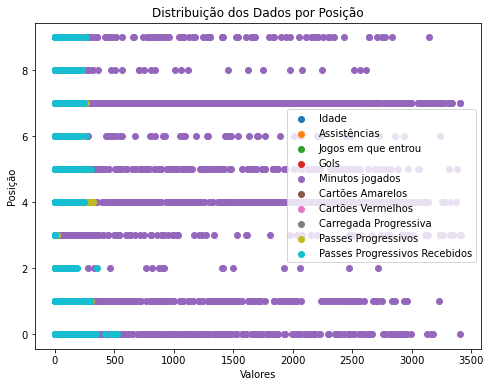

In [4]:
# Selecionar as colunas para visualização
columns = ['Idade', 'Assistências', 'Jogos em que entrou', 'Gols', 'Minutos jogados',
           'Cartões Amarelos', 'Cartões Vermelhos', 'Carregada Progressiva',
           'Passes Progressivos', 'Passes Progressivos Recebidos']

position_col = 'Posição'  # Coluna "Posição"

# Inicializar o codificador de rótulos
label_encoder = LabelEncoder()

# Codificar a coluna "Posição"
df3_soccer_encoded = df3_soccer.copy()
df3_soccer_encoded['Posição'] = label_encoder.fit_transform(df3_soccer['Posição'])

# Configurações do gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Plotar os dados de cada coluna em relação à coluna "Posição"
for col in columns:
    ax.scatter(df3_soccer_encoded[col], df3_soccer_encoded[position_col], label=col)

# Definir rótulos e título do gráfico
ax.set_xlabel('Valores')
ax.set_ylabel('Posição')
ax.set_title('Distribuição dos Dados por Posição')

# Adicionar legenda
ax.legend()

# Exibir o gráfico
plt.show()

# Fazendo um Modelo de Classificação usando RandomForestClassifier

In [5]:
# Selecionar as colunas que serão usadas no features (X) e no target (y)
X = df3_soccer[['Idade', 'Assistências', 'Jogos em que entrou', 'Gols', 'Minutos jogados',
                'Cartões Amarelos', 'Cartões Vermelhos', 'Carregada Progressiva',
                'Passes Progressivos', 'Passes Progressivos Recebidos']]
y = df3_soccer['Posição']

# Inicializar o codificador de rótulos
label_encoder = LabelEncoder()

# Codificar a coluna "Posição" para transforma-la de String para Int
y_encoded = label_encoder.fit_transform(y)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Inicializar o scaler
scaler = StandardScaler()

# Normalizar os dados de treino
X_train_scaled = scaler.fit_transform(X_train)

# Normalizar os dados de teste
X_test_scaled = scaler.transform(X_test)

# Depois de alguns testes concluí que esses são os melhores parâmentros para usar
best_params = {'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 400}

#---------------------------------------------------------------------------------------
# Fiz alguns testes para encontrar o melhor parâmetro possível:

#{'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 400}
#{'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 100}
#{'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 400}
#{'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 400}
#{'max_depth': 25, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 100}
#R2: 0.5108055672746152
#{'max_depth': 25, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 400}
#R2: 0.5153590200006327
#{'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 400}
#R2: 0.5098776022346401
#{'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 100}
#R2: 0.5128151056514734
#{'max_depth': 25, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 400}
#R2: 0.5144029321863693
#{'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 400}
#R2: 0.5134411827606817
#{'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 400}
#R2: 0.5134411827606817
#{'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 400}
#R2: 0.5146452619302855
#{'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 400}
#R2: 0.517090480788897
#{'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 400}
#R2: 0.5150352080193056
#---------------------------------------------------------------------------------------

# Inicializar o modelo RandomForestClassifier
random_forest_model = RandomForestClassifier(**best_params)

# Treinamento do modelo 
random_forest_model.fit(X_train_scaled, y_train)

# Fazer previsões com o modelo treinado
random_forest_predictions = random_forest_model.predict(X_test_scaled)

# Calcular a acuracia das previsões
accuracy = accuracy_score(y_test, random_forest_predictions)

# printar a acuracia de acertos
print("Acurácia:", accuracy)

Acurácia: 0.5665467625899281


## Quantidade de acertos e erros por Posição no modelo do teste

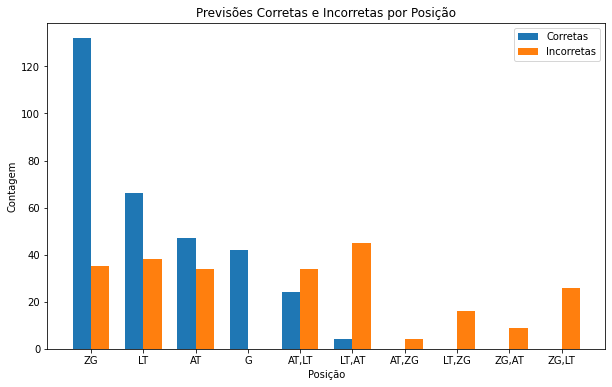

In [6]:
# Decodificar as previsões para obter as classes originais
y_test_decoded = label_encoder.inverse_transform(y_test)
random_forest_predictions_decoded = label_encoder.inverse_transform(random_forest_predictions)

# Pegar cada posição possivel
positions = np.unique(df3_soccer['Posição'])

# contar as previsões corretas e incorretas para cada posição
correct_counts = pd.Series(0, index=positions)
incorrect_counts = pd.Series(0, index=positions)

# Contar as previsões corretas e incorretas para cada posição
for i in range(len(random_forest_predictions)):
    if random_forest_predictions[i] == y_test[i]:
        correct_counts[y_test_decoded[i]] += 1
    else:
        incorrect_counts[y_test_decoded[i]] += 1

# Ordenar as posições com base na contagem de previsões corretas
sorted_positions = correct_counts.sort_values(ascending=False).index

# Ajustar o gráfico de barras
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(positions))

# Plotar as barras para previsões corretas e incorretas, usando a ordem correta das posições
plt.bar(index, correct_counts[sorted_positions], bar_width, label='Corretas')
plt.bar(index + bar_width, incorrect_counts[sorted_positions], bar_width, label='Incorretas')

# Configurar o eixo x
plt.xticks(index + bar_width / 2, sorted_positions)
plt.xlabel('Posição')
plt.ylabel('Contagem')

# Configurar título e legenda
plt.title('Previsões Corretas e Incorretas por Posição')
plt.legend()

# Exibir o gráfico
plt.show()

## Curva Precision-Recall para o resultado

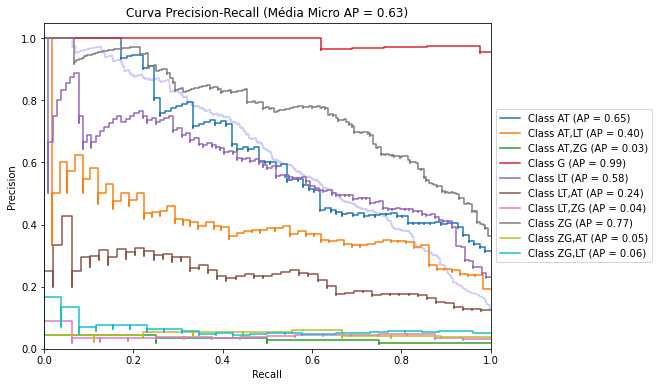

In [7]:
# Pegar cada posição possivel
unique_positions = np.unique(df3_soccer['Posição'])

# Binarizar as classes
y_test_bin = label_binarize(y_test_decoded, classes=unique_positions)
n_classes = y_test_bin.shape[1]

# Calcular as probabilidades de previsão para cada classe
y_scores = random_forest_model.predict_proba(X_test_scaled)

# Calcular a curva Precision-Recall para cada posição
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_scores[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_scores[:, i])

# Calcular a média da precisão média ponderada (average precision score) para a média micro
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_scores.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_scores, average="micro")

# Plotar a curva Precision-Recall para cada classe
plt.figure(figsize=(8, 6))
plt.step(recall["micro"], precision["micro"], color='b', alpha=0.2, where='post')
for i in range(n_classes):
    plt.step(recall[i], precision[i], where='post', label='Class {0} (AP = {1:0.2f})'.format(unique_positions[i], average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva Precision-Recall (Média Micro AP = {0:0.2f})'.format(average_precision["micro"]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Fazendo outro Modelo , mas agora retirando os outliers do dataset 

## Retirando os outliers do dataset

In [8]:
# Selecionar as colunas para calcular o Z-Score e remover outliers
columns = ['Idade', 'Assistências', 'Jogos em que entrou', 'Gols', 'Minutos jogados',
           'Cartões Amarelos', 'Cartões Vermelhos', 'Carregada Progressiva',
           'Passes Progressivos', 'Passes Progressivos Recebidos']

# Calcular o Z-Score das colunas selecionadas
z_scores = stats.zscore(df3_soccer[columns])

# Definir um limite para identificar outliers com base no desvio padrão
threshold = 3

# Identificar os outliers pelo indice
outlier_indices = (np.abs(z_scores) > threshold).any(axis=1)

# Remover outliers do DataSet
df3_soccer = df3_soccer[~outlier_indices]

df3_soccer.head(2775)

,Unnamed: 0,Nome,Sobrenome,Nacionalidade,Posição,Clube,Liga,Idade,Ano em que nasceu,Jogos em que entrou,...,Gols/90min,Assis/90min,(Gols+Assis)/90min,Gols Normais/90min,(Gols normais+Assis)/90min,Gols previstos por 90min,Gols Assistidos esperados em 90min,Gols esperados+gols previstos em 90min,Gols normais previstos em 90min,"Gols esperados,exceto pênaltis,+gols assistidos em 90min"
0,1,Brenden,Aaronson,USA,"LT,AT",Leeds United,Premier League,21,2000,36,...,"0,04","0,11","0,15","0,04","0,15","0,15","0,16","0,31","0,15","0,31"
1,2,Paxten,Aaronson,USA,"LT,ZG",Eint Frankfurt,Bundesliga,18,2003,7,...,"0,00","0,00","0,00","0,00","0,00","0,09","0,03","0,11","0,09","0,11"
2,3,James,Abankwah,IRL,ZG,Udinese,Serie A,18,2004,2,...,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
3,4,George,Abbott,ENG,LT,Tottenham,Premier League,16,2005,1,...,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
5,6,Himad,Abdelli,ALG,"LT,AT",Angers,Ligue 1,22,1999,30,...,"0,08","0,08","0,17","0,08","0,17","0,06","0,12","0,18","0,06","0,18"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2768,2774,Petar,Zovko,BIH,G,Spezia,Serie A,20,2002,1,...,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
2771,2777,Szymon,Żurkowski,POL,LT,Fiorentina,Serie A,24,1997,2,...,"0,00","2,81","2,81","0,00","2,81","0,33","0,06","0,40","0,33","0,40"
2772,2778,Szymon,Żurkowski,POL,LT,Spezia,Serie A,24,1997,10,...,"0,00","0,00","0,00","0,00","0,00","0,12","0,00","0,12","0,12","0,12"
2774,2780,Milan,Đurić,BIH,AT,Hellas Verona,Serie A,32,1990,28,...,"0,07","0,07","0,13","0,07","0,13","0,09","0,08","0,18","0,09","0,18"


## Distribuição dos novos dados por Posição

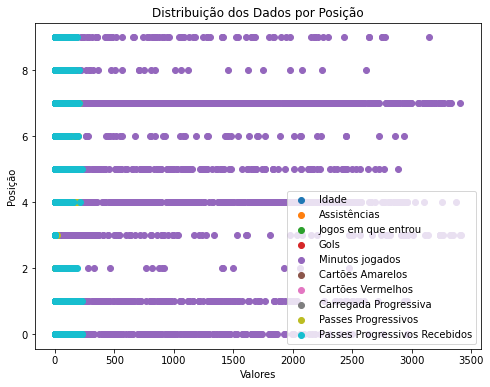

In [9]:
# Selecionar as colunas para visualização
columns = ['Idade', 'Assistências', 'Jogos em que entrou', 'Gols', 'Minutos jogados',
           'Cartões Amarelos', 'Cartões Vermelhos', 'Carregada Progressiva',
           'Passes Progressivos', 'Passes Progressivos Recebidos']
position_col = 'Posição'  # Coluna "Posição"

# Inicializar o codificador de rótulos
label_encoder = LabelEncoder()

# Codificar a coluna "Posição"
df3_soccer_encoded = df3_soccer.copy()
df3_soccer_encoded['Posição'] = label_encoder.fit_transform(df3_soccer['Posição'])

# Configurações do gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Plotar os dados de cada coluna em relação à coluna "Posição"
for col in columns:
    ax.scatter(df3_soccer_encoded[col], df3_soccer_encoded[position_col], label=col)

# Definir rótulos e título do gráfico
ax.set_xlabel('Valores')
ax.set_ylabel('Posição')
ax.set_title('Distribuição dos Dados por Posição')

# Adicionar legenda
ax.legend()

# Exibir o gráfico
plt.show()

# Fazendo um Modelo de Classificação usando RandomForestClassifier

In [10]:
# Selecionar as colunas que serão usadas no features (X) e no target (y)
X = df3_soccer[['Idade', 'Assistências', 'Jogos em que entrou', 'Gols', 'Minutos jogados',
                'Cartões Amarelos', 'Cartões Vermelhos', 'Carregada Progressiva',
                'Passes Progressivos', 'Passes Progressivos Recebidos']]
y = df3_soccer['Posição']

# Inicializar o codificador de rótulos
label_encoder = LabelEncoder()

# Codificar a coluna "Posição" para transforma-la de String para Int
y_encoded = label_encoder.fit_transform(y)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Inicializar o scaler
scaler = StandardScaler()

# Normalizar os dados de treino
X_train_scaled = scaler.fit_transform(X_train)

# Normalizar os dados de teste
X_test_scaled = scaler.transform(X_test)

# Depois de alguns testes concluí que esses são os melhores parâmentros para usar
best_params = {'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 400}

# Inicializar o modelo RandomForestClassifier
random_forest_model = RandomForestClassifier(**best_params)

# Treinar o modelo 
random_forest_model.fit(X_train_scaled, y_train)

# Fazer previsões usando o modelo RandomForestClassifier
random_forest_predictions = random_forest_model.predict(X_test_scaled)

# Calcular a acuracia das previsões
accuracy = accuracy_score(y_test, random_forest_predictions)

# printar a acuracia de acertos
print("Acurácia:", accuracy)

Acurácia: 0.5728542914171657


## Quantidade de acertos e erros por Posição no modelo do teste

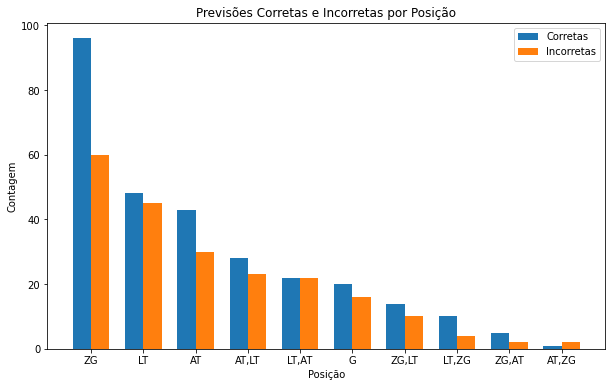

In [11]:
# contar as previsões corretas e incorretas para cada posição
correct_counts = pd.Series(0, index=positions)
incorrect_counts = pd.Series(0, index=positions)

# Contar as previsões corretas e incorretas para cada posição
for i in range(len(random_forest_predictions)):
    if random_forest_predictions[i] == y_test[i]:
        correct_counts[y_test_decoded[i]] += 1
    else:
        incorrect_counts[y_test_decoded[i]] += 1

# Ordenar as posições com base na contagem de previsões corretas
sorted_positions = correct_counts.sort_values(ascending=False).index

# Ajustar o gráfico de barras
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(positions))

# Plotar as barras para previsões corretas e incorretas, usando a ordem correta das posições
plt.bar(index, correct_counts[sorted_positions], bar_width, label='Corretas')
plt.bar(index + bar_width, incorrect_counts[sorted_positions], bar_width, label='Incorretas')

# Configurar o eixo x
plt.xticks(index + bar_width / 2, sorted_positions)
plt.xlabel('Posição')
plt.ylabel('Contagem')

# Configurar título e legenda
plt.title('Previsões Corretas e Incorretas por Posição')
plt.legend()

# Exibir o gráfico
plt.show()

## Curva Precision-Recall para o resultado

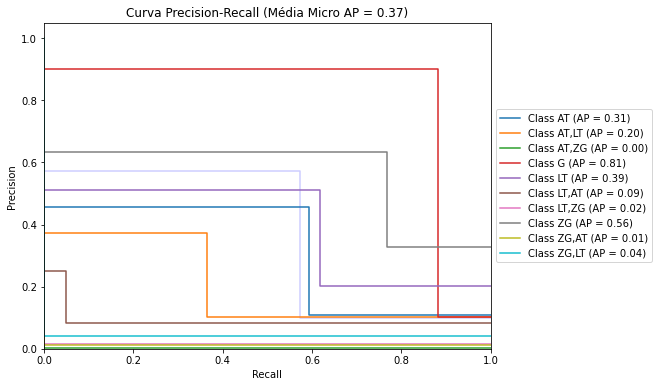

In [12]:
# Decodificar as previsões para obter as classes originais
y_test_decoded = label_encoder.inverse_transform(y_test)
random_forest_predictions_decoded = label_encoder.inverse_transform(random_forest_predictions)

# Criar uma lista de listas com as classes reais e as previsões
y_test_multi = [[pos] for pos in y_test_decoded]
random_forest_predictions_multi = [[pos] for pos in random_forest_predictions_decoded]

# Binarizar as classes usando MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_test_bin = mlb.fit_transform(y_test_multi)
random_forest_predictions_bin = mlb.transform(random_forest_predictions_multi)

# Calcular a curva Precision-Recall para cada classe
precision = dict()
recall = dict()
average_precision = dict()
for i, class_label in enumerate(mlb.classes_):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], random_forest_predictions_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], random_forest_predictions_bin[:, i])

# Calcular a média da precisão média ponderada (average precision score) para a média micro
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), random_forest_predictions_bin.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, random_forest_predictions_bin, average="micro")

# Plotar a curva Precision-Recall para cada classe
plt.figure(figsize=(8, 6))
plt.step(recall["micro"], precision["micro"], color='b', alpha=0.2, where='post')
for i, class_label in enumerate(mlb.classes_):
    plt.step(recall[i], precision[i], where='post', label='Class {0} (AP = {1:0.2f})'.format(class_label, average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva Precision-Recall (Média Micro AP = {0:0.2f})'.format(average_precision["micro"]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()